# Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import calendar

# Define Your Monthly Budget:

In [6]:
# Define the category and budget amount pairs
budget_data = [
    ('Food', 400.00),
    ('Transportation', 200.00),
    ('Miscellaneous', 400.00),
    ('Health', 200.00),
    ('Housing', 1500.00),
    ('Savings', 1200.00)
]

# Create the DataFrame
budget = pd.DataFrame(budget_data, columns=['Category', 'BudgetAmount'])

#Calculate total monthly budget
total_monthly_budget = round(budget['BudgetAmount'].sum(), 2)
print('Total Monthly Budget =', total_monthly_budget)

# Display the DataFrame
budget


Total Monthly Budget = 3900.0


,Category,BudgetAmount
0,Food,400.0
1,Transportation,200.0
2,Miscellaneous,400.0
3,Health,200.0
4,Housing,1500.0
5,Savings,1200.0


# Import Expenses CSV file

In [2]:
# Specify the file path
file_path = "/Users/juanflores/Documents/Fake Expenses 2023.csv"

# Read CSV file
expenses = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
expenses['Date'] = pd.to_datetime(expenses['Date'])

expenses.head()

,Date,Category,Notes,Amount
0,2023-03-07,Food,BurgerBlitz,6.55
1,2023-04-04,Food,BurgerBlitz,6.95
2,2023-03-03,Food,BurgerBlitz,7.09
3,2023-01-06,Food,BurgerBlitz,7.54
4,2023-09-12,Food,DailyChoice Foods,7.72


In [3]:
expenses.dtypes

Date        datetime64[ns]
Category            object
Notes               object
Amount             float64
dtype: object

In [5]:
# Specify the column you want to find unique values in
column_name = 'Category'

# Get unique values from the specified column
unique_values = expenses[column_name].unique()
unique_values

array(['Food', 'Health', 'Housing', 'Miscellaneous', 'Savings',
       'Transportation'], dtype=object)

# Import Income CSV File

In [5]:
# Specify the file path
file_path = '/Users/juanflores/Downloads/Income/Income 127509a0873180e3b859e2b102354b08_all.csv'

# Read CSV file
income = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
income['Date'] = pd.to_datetime(income['Date'])

# Display the data table
income.head()

,Date,Account,Source,Amount
0,2024-04-30,Fidelity,Tax Refund,995.00
1,2024-08-14,Fidelity,Appen,295.54
2,NaT,NaN,NaN,NaN


# Calculate monthly spending and remaining budget

In [6]:
# Specify the month and year you are interested in
month = 11
year = 2024
month_name = calendar.month_name[month]

# Filter expenses by the specified month and year
monthly_expenses = expenses[(expenses['Date'].dt.month == month) & (expenses['Date'].dt.year == year)]

# Calculate total month-to-date spending
total_mtd_spending = round(monthly_expenses['Amount'].sum(), 2)

# Calculate month-to-date spending grouped by category
mtd_spending_by_category = monthly_expenses.groupby('Category')['Amount'].sum().reset_index()

# Merge the MTD spending with the Budget DataFrame
# Perform a left merge so that all categories in the Budget remain, even if no spending occurred
if month <= 8:
    budget_with_spending = pd.merge(budget_1, mtd_spending_by_category, on='Category', how='left')
else:
    budget_with_spending = pd.merge(budget_2, mtd_spending_by_category, on='Category', how='left')

# Fill NaN values in the 'Amount' column with 0 (if there's no spending for a category)
budget_with_spending['Amount'] = budget_with_spending['Amount'].fillna(0)

# Calculate the remaining budget by subtracting MTD spending from BudgetAmount
budget_with_spending['RemainingBudget'] = budget_with_spending['BudgetAmount'] - budget_with_spending['Amount']

# Calculate the total remaining budget
if month <= 8:
    total_remaining_budget = round(total_monthly_budget_1-total_mtd_spending, 2)
else:
    total_remaining_budget = round(total_monthly_budget_2-total_mtd_spending, 2)

# Calculate YTD Budget Variance

In [7]:
# Filter Year-to-Date Expenses
ytd_expenses = expenses[(expenses['Date'].dt.month <= month) & (expenses['Date'].dt.year == year)]

# Calculate Total YTD Spending
total_ytd_spending = round(ytd_expenses['Amount'].sum(), 2)

# Calculate Total YTD Budget
if month <= 8:
    total_ytd_budget = budget_1['BudgetAmount'].sum() * month
else:
    total_ytd_budget = (budget_1['BudgetAmount'].sum() * 8) + (budget_2['BudgetAmount'].sum() * (month - 8))

# Calculate YTD Budget Variance
ytd_budget_variance = round(total_ytd_budget - total_ytd_spending, 2)

# Calculate Monthly Net Income

In [8]:
# Net Income = Total Income - Total Expenses
# Filter income by the specified month and year
monthly_income = income[(income['Date'].dt.month == month) & (income['Date'].dt.year == year)]

# Calculate total monthly income
total_monthly_income = round(monthly_income['Amount'].sum(), 2)

# Calculate Monthly Net Income
monthly_net_income = round(total_monthly_income - total_mtd_spending, 2)


# Calculate YTD Net Income

In [9]:
# YTD Net Income = Total YTD Income - Total YTD Spending
# Calculate Total YTD Income
ytd_income = income[(income['Date'].dt.month <= month) & (income['Date'].dt.year == year)]
total_ytd_income = round(ytd_income['Amount'].sum(), 2)

# Calculate YTD Net Income
ytd_net_income = round(total_ytd_income - total_ytd_spending, 2)

# Display the results

In [10]:
# Print the results
print(f"{month_name} {year}")
print("Total Month-to-Date Spending:", total_mtd_spending)
print('Total Remaining Budget =', total_remaining_budget, '= Monthly Budget Variance')
print(f"YTD Budget Variance: {ytd_budget_variance}")
print(f"Total Monthly Income: {total_monthly_income}")
print(f"Monthly Net Income: {monthly_net_income}")
print(f"YTD Net Income: {ytd_net_income}")
budget_with_spending

November 2024
Total Month-to-Date Spending: 814.81
Total Remaining Budget = -9.81 = Monthly Budget Variance
YTD Budget Variance: -267.17
Total Monthly Income: 0.0
Monthly Net Income: -814.81
YTD Net Income: -8871.63


,Category,BudgetAmount,Amount,RemainingBudget
0,Gas,60.0,36.42,23.58
1,Gym,20.0,0.00,20.00
2,Food,255.0,127.13,127.87
3,Haircut,25.0,0.00,25.00
4,Miscellaneous,320.0,97.26,222.74
5,Health,125.0,99.00,26.00
6,Education,0.0,455.00,-455.00


# Plot monthly budget and spending

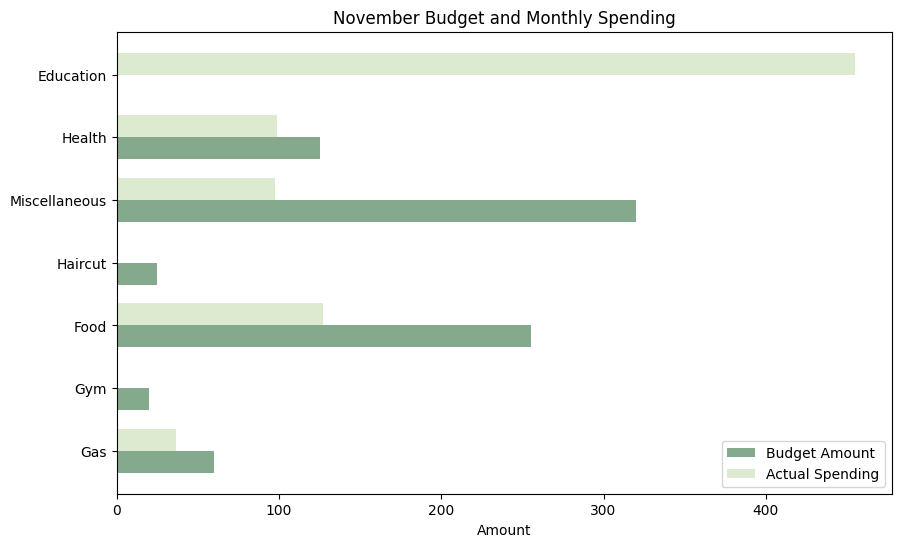

In [11]:
import matplotlib.pyplot as plt

# Sample data (you can modify it as per your actual values)
data = {
    'Category': budget_with_spending['Category'],
    'Budget Amount': budget_with_spending['BudgetAmount'],
    'Actual Spending': budget_with_spending['Amount']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the position and width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(df))

# Plot bars
ax.barh(index, df['Budget Amount'], bar_width, label='Budget Amount', color='#84a98c')
ax.barh([i + bar_width for i in index], df['Actual Spending'], bar_width, label='Actual Spending', color='#dceacf')

# Add labels and title
ax.set_xlabel('Amount')
ax.set_title(f"{month_name} Budget and Monthly Spending")
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(df['Category'])
ax.legend()

# Save the chart as a PNG file
plt.savefig('budget_monthly_spending.png', format='png', dpi=300)  # Adjust dpi for higher quality if needed

# Display the plot
plt.show()